#### L4 Demo 3 - Face Attributes

####  Importing Useful Python Libraries or package

In [1]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw


from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person


import matplotlib.pyplot as plt

#### Utilitiy Functions

In [2]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()

In [3]:
def show_image_object_in_cell(image_object):
    plt.figure(figsize=(20,10))
    plt.imshow(image_object)
    plt.show()

In [4]:
# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

In [5]:
def drawFaceRectangles(source_file, datected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in datected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

#### Accessing Specific Azure Resources 

In [6]:
KEY = "--------------------------------"
ENDPOINT = "https://-----------------.cognitiveservices.azure.com/"

In [7]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

## Distracted driver image to show the changes in headpose in comparision with straight face
* Image source: https://www.kaggle.com/c/state-farm-distracted-driver-detection/overview

In [8]:
image_01 = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/statefarm-image-01.png"
image_02 = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/statefarm-image-02.png"
face_portrait = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/face-portrait.jpg"

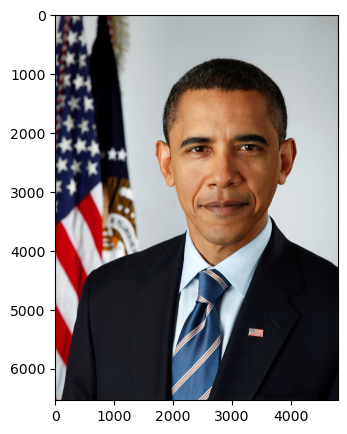

In [9]:
show_image_in_cell(face_portrait)

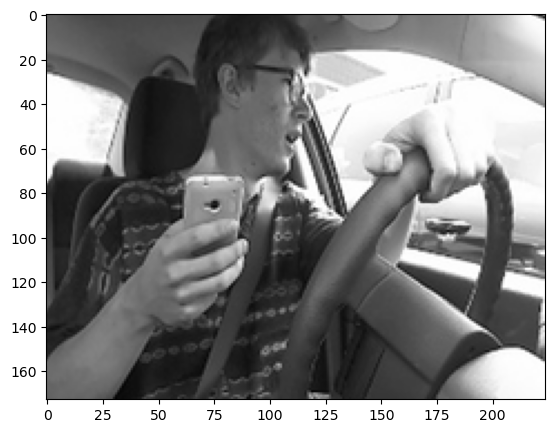

In [10]:
show_image_in_cell(image_01)

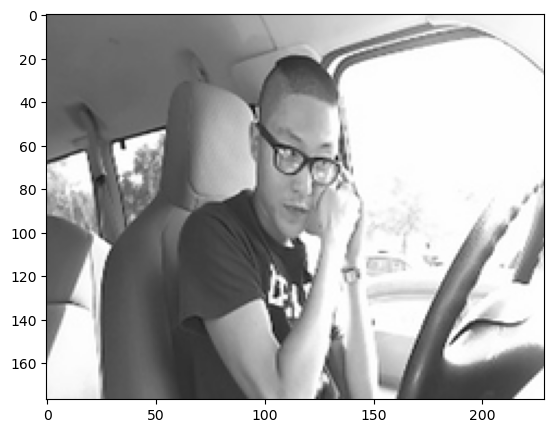

In [11]:
show_image_in_cell(image_02)

#### Using Face - Detect API with detection model and face attribute parameters 

In [12]:
# Detect Face form an image
def detect_face_with_attributes_01_from_any_url(selected_image_url):
    detected_faces = face_client.face.detect_with_url(url=selected_image_url, 
                                                      detection_model='detection_03',
                                                     return_face_attributes=[
                    'headpose',
                    'mask'
                ])
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(selected_image_url))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

#### Using Face - Detect API with detection model and different face attribute parameters 

\# To mitigate these risks, we have opted to not support a general-purpose system in the Face API that purports to infer emotional states, gender, age, smile, facial hair, hair, and makeup. Detection of these attributes will no longer be available to new customers beginning June 21, 2022, and existing customers have until June 30, 2023, to discontinue use of these attributes before they are retired.

https://azure.microsoft.com/en-us/blog/responsible-ai-investments-and-safeguards-for-facial-recognition/?WT.mc_id=AI-MVP-5003365

- emotional states
- gender
- age
- smile
- facial hair
- hair
- makeup

In [13]:
# Detect Face form an image
"""def detect_face_with_attributes_02_from_any_url(selected_image_url):
    detected_faces = face_client.face.detect_with_url(url=selected_image_url, 
                                                     return_face_attributes=[
                    'age',
                    'gender',
                    'headPose',
                    'smile',
                    'facialHair',
                    'glasses',
                    'emotion',
                    'hair',
                    'makeup',
                    'occlusion',
                    'accessories',
                    'blur',
                    'exposure',
                    'noise'
                ])
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(selected_image_url))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces"""



# Detect Face form an image
def detect_face_with_attributes_02_from_any_url(selected_image_url):
    detected_faces = face_client.face.detect_with_url(url=selected_image_url, 
                                                     return_face_attributes=[
                    'headPose',
                    #'hair',
                    'glasses',
                    'occlusion',
                    'accessories',
                    'blur',
                    'exposure',
                    'noise'
                ])
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(selected_image_url))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

In [14]:
detected_faces_00_object = detect_face_with_attributes_01_from_any_url(face_portrait)

Total face(s) detected  from 1


In [15]:
for face in detected_faces_00_object: 
    print (face)

{'additional_properties': {}, 'face_id': '2be9e349-b04d-49f5-a53c-7ad4d8b9fc78', 'recognition_model': None, 'face_rectangle': <azure.cognitiveservices.vision.face.models._models_py3.FaceRectangle object at 0x7f8dae988640>, 'face_landmarks': None, 'face_attributes': <azure.cognitiveservices.vision.face.models._models_py3.FaceAttributes object at 0x7f8dae97fac0>}


In [16]:
for face in detected_faces_00_object: 
    print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': -1.2, 'yaw': -0.4, 'pitch': -8.6}


#### Same detection model with a different image: Image_01

In [17]:
detected_faces_01_object = detect_face_with_attributes_01_from_any_url(image_01)

Total face(s) detected  from 1


In [18]:
for face in detected_faces_01_object: 
        print (face)

{'additional_properties': {}, 'face_id': '3a174bfa-6673-451c-88da-fb5cbc2c52cd', 'recognition_model': None, 'face_rectangle': <azure.cognitiveservices.vision.face.models._models_py3.FaceRectangle object at 0x7f8dae97f940>, 'face_landmarks': None, 'face_attributes': <azure.cognitiveservices.vision.face.models._models_py3.FaceAttributes object at 0x7f8dae978220>}


In [19]:
for face in detected_faces_01_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': 14.5, 'yaw': 76.7, 'pitch': 7.0}


#### Same detection model with a different image: Image_02

In [20]:
detected_faces_02_object = detect_face_with_attributes_01_from_any_url(image_02)

Total face(s) detected  from 1


In [21]:
for face in detected_faces_02_object: 
        print (face.face_attributes.mask)

{'additional_properties': {}, 'type': <MaskType.no_mask: 'noMask'>, 'nose_and_mouth_covered': False}


In [22]:
for face in detected_faces_02_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': 10.5, 'yaw': 17.7, 'pitch': -18.9}


#### Same Image Different Detection Model

In [23]:
detected_faces_001_object = detect_face_with_attributes_02_from_any_url(face_portrait)

Total face(s) detected  from 1


In [24]:
for face in detected_faces_001_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': -0.2, 'yaw': -0.6, 'pitch': -5.4}


#### Extracting different face attributes from the face detect API result

In [25]:
for face in detected_faces_001_object: 
    print (face.face_attributes.age)
    print (face.face_attributes.emotion)
    print (face.face_attributes.gender)
    print (face.face_attributes.accessories)
    print (face.face_attributes.smile)
    print (face.face_attributes.hair)
    print (face.face_attributes.glasses)
    print (face.face_attributes.occlusion)
    print (face.face_attributes.blur)
    print (face.face_attributes.exposure)
    print (face.face_attributes.mask)
   

None
None
None
[]
None
None
GlassesType.no_glasses
{'additional_properties': {}, 'forehead_occluded': False, 'eye_occluded': False, 'mouth_occluded': False}
{'additional_properties': {}, 'blur_level': <BlurLevel.high: 'High'>, 'value': 1.0}
{'additional_properties': {}, 'exposure_level': <ExposureLevel.good_exposure: 'GoodExposure'>, 'value': 0.58}
None


#### Extracting Hair type and color face attributes from the face detect API result

In [26]:
"""for face in detected_faces_001_object: 
    print (face.face_attributes.hair)
    print (len(face.face_attributes.hair.hair_color))
    print (face.face_attributes.hair.hair_color[0])
    for each_hair_color in face.face_attributes.hair.hair_color:
        print (each_hair_color)"""
for face in detected_faces_001_object: 
    print (face.face_attributes.occlusion)

{'additional_properties': {}, 'forehead_occluded': False, 'eye_occluded': False, 'mouth_occluded': False}


In [27]:
for face in detected_faces_02_object: 
        print (face.face_attributes.age)

None


In [28]:
for face in detected_faces_01_object: 
        print (face.face_attributes.age)

None
